In [1]:
#Exploratory Data Analysis (EDA) on Titanic dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the dataset 

df = pd.read_csv(r"D:\internship\Datasets\Titanic-Dataset.csv")

df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#data cleaning

df.isnull().sum()
#df.duplicated().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Age missing values
median_val = df['Age'].median()
df['Age'].fillna(median_val, inplace=True)

#Cabin missing values
mode_val = df['Cabin'].mode()[0]
df['Cabin'].fillna(mode_val, inplace=True)

#Embarked missing values
mode_val = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_val, inplace=True)


C:\Users\BLESSING\AppData\Local\Temp\ipykernel_21956\4089272454.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_val, inplace=True)
C:\Users\BLESSING\AppData\Local\Temp\ipykernel_21956\4089272454.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [5]:
#Checking categorical vs numerical columns

#survived vs not survived numbers
print("--- Survived vs Not Survived Counts ---")
print(df['Survived'].value_counts())

#Categorical feature distributions
print("\n--- Sex Counts ---")
print(df['Sex'].value_counts())

print("\n--- Pclass Counts ---")
print(df['Pclass'].value_counts())

print("\n--- Embarked Counts ---")
print(df['Embarked'].value_counts())

df.dtypes

--- Survived vs Not Survived Counts ---
Survived
0    549
1    342
Name: count, dtype: int64

--- Sex Counts ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Pclass Counts ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

--- Embarked Counts ---
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

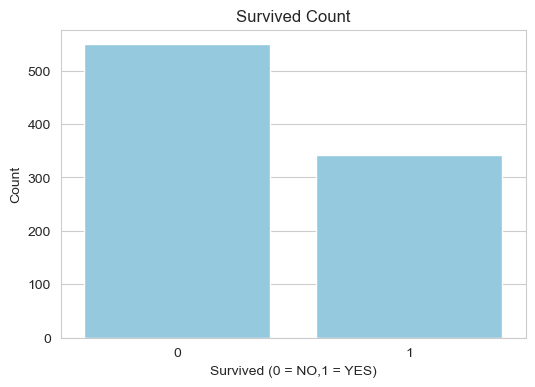

In [6]:
#DataVisualization
sns.set_style("whitegrid")
#1.Survival count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',data=df,color='skyblue')
plt.title("Survived Count")
plt.xlabel("Survived (0 = NO,1 = YES)")
plt.ylabel("Count")
plt.show()

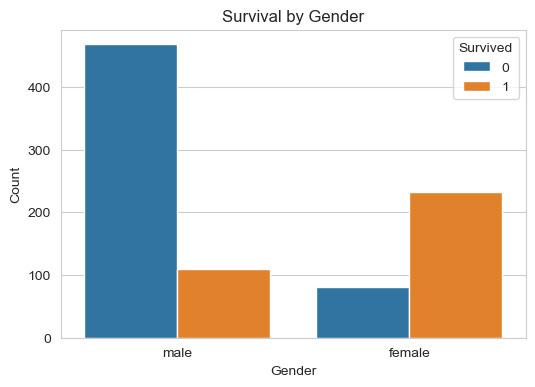

In [7]:
# 2. Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex',hue='Survived',data = df)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

C:\Users\BLESSING\AppData\Local\Temp\ipykernel_21956\569275388.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='Pclass', hue='Survived', data=df,color='blue')


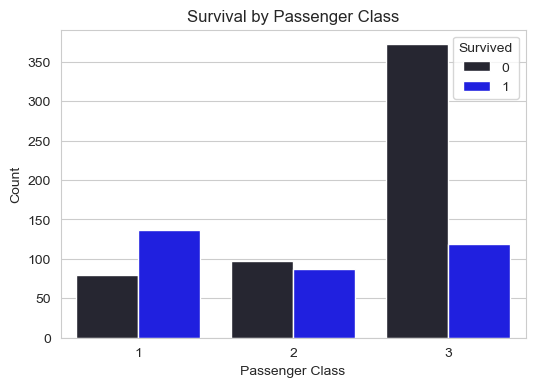

In [8]:
# 3. Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df,color='blue')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

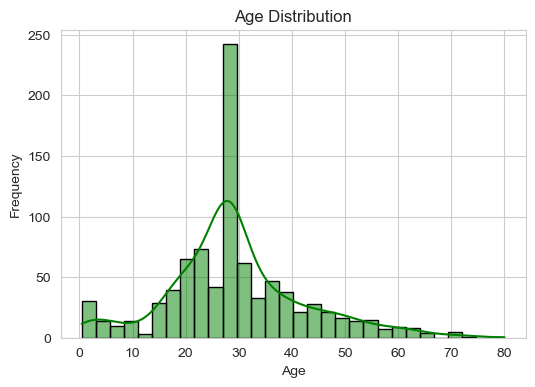

In [9]:
# 4. Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True,edgecolor='black',color='green')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


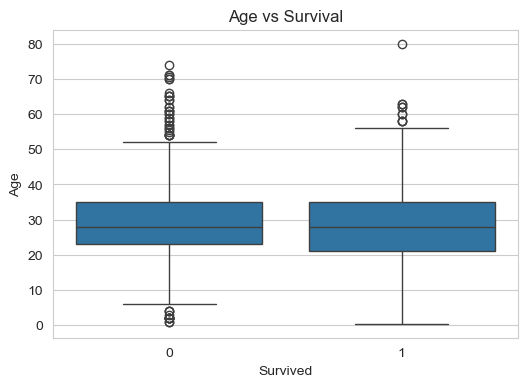

In [10]:
# 5. Age vs Survival
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived',y='Age', data=df)
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

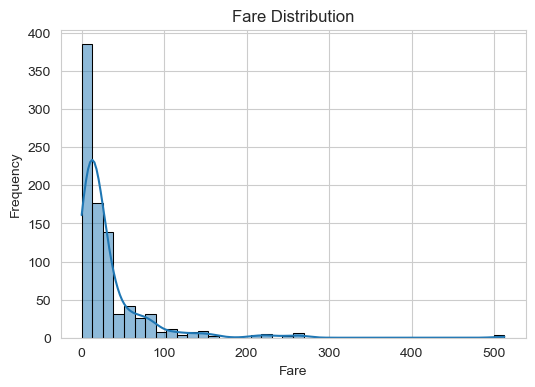

In [11]:
# 6. Fare Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'],bins=40,kde=True,edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

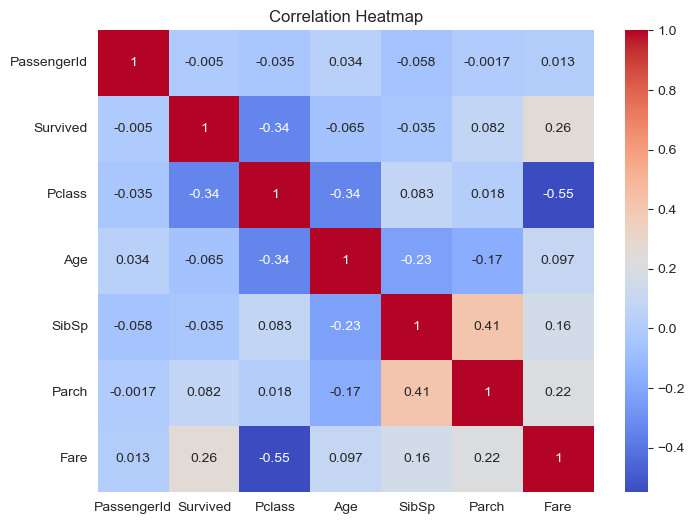

In [12]:
# 7. Correlation Heatmap
plt.figure(figsize=(8,6))
numeric_df=df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

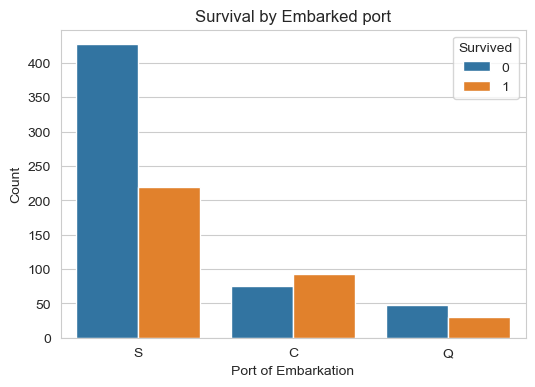

In [13]:
# 8. Embarked vs Survival
plt.figure(figsize=(6,4))
sns.countplot(x="Embarked", hue='Survived',data=df)
plt.title('Survival by Embarked port')
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

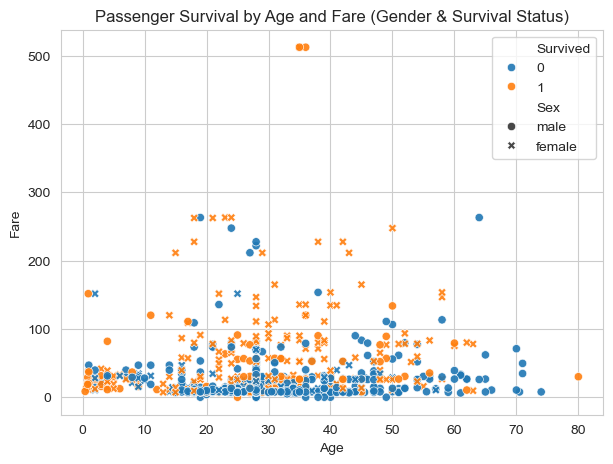

In [22]:
#9.Scatter Plot: Age vs Fare
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='Age',
    y='Fare',
    hue='Survived',
    style='Sex',
    data=df,
    alpha=0.9
)

plt.title("Passenger Survival by Age and Fare (Gender & Survival Status)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


In [14]:
##Females had a significantly higher survival rate than males.

#Passengers in 1st class survived more than those in 2nd and 3rd class.

#Younger passengers had a higher survival chance.

#Fare and survival show some correlation.

#Strong relationship observed between Pclass, Fare, and Survived.##